In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [1]:
df = pd.read_csv ('annual-national-electricity-generation-total-and-hydrogenera.csv')
print(df)

    elect_gen  year  gw_hours
0   total_net  1974   20175.8
1   total_net  1975   20120.3
2   total_net  1976   21220.4
3   total_net  1977   21792.4
4   total_net  1978   21854.5
..        ...   ...       ...
75      hydro  2009   23975.6
76      hydro  2010   24492.7
77      hydro  2011   24868.4
78      hydro  2012   22673.6
79      hydro  2013   22815.4

[80 rows x 3 columns]


In [2]:
df.head()

,elect_gen,year,gw_hours
0,total_net,1974,20175.8
1,total_net,1975,20120.3
2,total_net,1976,21220.4
3,total_net,1977,21792.4
4,total_net,1978,21854.5


In [3]:
df.tail()

,elect_gen,year,gw_hours
75,hydro,2009,23975.6
76,hydro,2010,24492.7
77,hydro,2011,24868.4
78,hydro,2012,22673.6
79,hydro,2013,22815.4


In [4]:
df.shape

(80, 3)

In [5]:
df.dtypes

elect_gen     object
year           int64
gw_hours     float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   elect_gen  80 non-null     object 
 1   year       80 non-null     int64  
 2   gw_hours   80 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [8]:
df.describe()

,year,gw_hours
count,80.000000,80.000000
mean,1993.500000,27359.800000
std,11.616226,8137.887698
min,1974.000000,14573.000000
25%,1983.750000,21871.150000
50%,1993.500000,24341.650000
75%,2003.250000,33525.125000
max,2013.000000,43405.600000


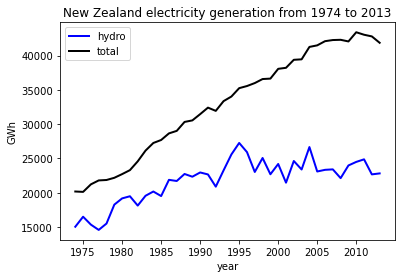

In [108]:
df.pivot(columns='elect_gen', index='year', values='gw_hours').plot(kind='line',
                                                        ylabel= 'GWh',
                                                        linewidth=2,
                                                        color=['blue','black'])

plt.legend(loc=0, labels=['hydro','total'])
plt.title("New Zealand electricity generation from 1974 to 2013")
plt.show()

In [38]:
# grouping the data
df_gp = df.groupby(['elect_gen','year'])['gw_hours'].mean()
print(df_gp)

elect_gen  year
hydro      1974    15037.0
           1975    16497.0
           1976    15344.0
           1977    14573.0
           1978    15503.0
                    ...   
total_net  2009    42063.9
           2010    43405.6
           2011    43041.8
           2012    42797.5
           2013    41867.3
Name: gw_hours, Length: 80, dtype: float64


In [40]:
df_gp=df_gp.unstack(level='elect_gen')
print(df_gp)

elect_gen    hydro  total_net
year                         
1974       15037.0    20175.8
1975       16497.0    20120.3
1976       15344.0    21220.4
1977       14573.0    21792.4
1978       15503.0    21854.5
1979       18259.0    22174.7
1980       19171.0    22712.7
1981       19483.0    23291.5
1982       18121.0    24575.9
1983       19554.0    26141.3
1984       20173.0    27253.6
1985       19510.8    27688.7
1986       21876.7    28652.1
1987       21709.3    29020.8
1988       22733.0    30323.3
1989       22333.3    30547.9
1990       22953.4    31459.4
1991       22665.5    32409.8
1992       20881.7    31936.4
1993       23258.0    33358.2
1994       25578.7    34025.9
1995       27259.4    35249.7
1996       25921.1    35560.0
1997       23025.6    35993.1
1998       25066.1    36579.3
1999       22690.3    36643.2
2000       24190.6    38068.7
2001       21464.4    38218.3
2002       24624.3    39385.8
2003       23386.6    39454.3
2004       26659.8    41264.2
2005      

In [41]:
df_gp["ratio_hydro_total"] = (df_gp["hydro"] / df_gp["total_net"])
print(df_gp)

elect_gen    hydro  total_net  ratio_hydro_total
year                                            
1974       15037.0    20175.8           0.745299
1975       16497.0    20120.3           0.819918
1976       15344.0    21220.4           0.723078
1977       14573.0    21792.4           0.668719
1978       15503.0    21854.5           0.709373
1979       18259.0    22174.7           0.823416
1980       19171.0    22712.7           0.844065
1981       19483.0    23291.5           0.836485
1982       18121.0    24575.9           0.737348
1983       19554.0    26141.3           0.748012
1984       20173.0    27253.6           0.740196
1985       19510.8    27688.7           0.704648
1986       21876.7    28652.1           0.763529
1987       21709.3    29020.8           0.748060
1988       22733.0    30323.3           0.749688
1989       22333.3    30547.9           0.731091
1990       22953.4    31459.4           0.729620
1991       22665.5    32409.8           0.699341
1992       20881.7  

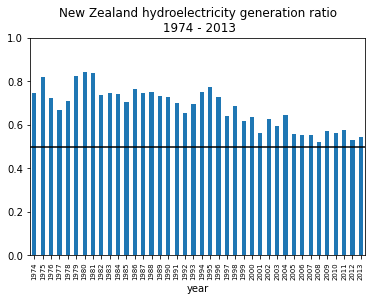

In [107]:
df_gp['ratio_hydro_total'].plot.bar()
plt.title("New Zealand hydroelectricity generation ratio\n 1974 - 2013")
plt.axhline(y=.5, color='black')
plt.ylim(top=1)
plt.xticks(size='x-small', rotation=90)
plt.show()